IMPORTAZIONE LIBRERIE

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import array 
import scipy.signal as signal
#Processing libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import seaborn as sns
from scipy.stats import zscore
from sklearn.multiclass import OneVsRestClassifier

# Model libraries
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

# Testing libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report, roc_curve, auc

# remove warnings
import warnings
warnings.filterwarnings('ignore')

CAMBIO PATH PER ANALISI RISPETTO AL LOG DI VOLO CONSIDERAT

In [2]:
path_file = os.path.abspath(os.getcwd())
print(path_file)
os.chdir(path_file)

c:\Users\chiar\OneDrive\Desktop\MantenzionePreventiva\ProgettoManutenzionePreventiva


ARRAY CHE CONTERRA' I DATAFRAME DI CIASCUN VOLO (PER UN TOTALE DI 18)

In [3]:
data_path = os.path.join(path_file,'*.csv') #lista di tutti gli elementi di estensione csv nella cartella path
csv_list = glob.glob(data_path) #converte data path in un output Unix-like (ls) (*.csv -> lista di elementi con estensione csv)
dataframe_collection = []
df_1 = pd.DataFrame()

# ciclo per scorrere tutti i csv
for csv_file in csv_list: # ciclo che scorre i csv nella cartella path
    df = pd.read_csv(csv_file) 
    #df = df.to_numpy()
    #df = df.to_records(index=False)
    #dataframe_collection.append(df)
    df_1 = df_1.append(df,ignore_index=True)
    #print(df)

# ciclo per scorrere tutti i csv
for csv_file in csv_list: # ciclo che scorre i csv nella cartella path
    df = pd.read_csv(csv_file) 
    #df = df.to_numpy()
    df = df.to_records(index=False)
    dataframe_collection.append(df)

#prova = pd.DataFrame(dataframe_collection)


In [4]:
print(df_1)

      tempo  <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  \
0       0.0 -0.032100   0.017081   -0.399284   0.134398         78.0   
1       1.0 -0.032346   0.017054   -0.400010   0.134356        102.0   
2       2.0 -0.032590   0.017026   -0.400594   0.134314         98.0   
3       3.0 -0.032832   0.016999   -0.401113   0.134271        102.0   
4       4.0 -0.033265   0.017017   -0.412325   0.134447        102.0   
...     ...       ...        ...         ...        ...          ...   
1344   62.0 -0.048472   0.006254   -0.082119   0.092673          0.0   
1345   63.0 -0.048289   0.006253   -0.081993   0.092571          0.0   
1346   64.0 -0.048212   0.006240   -0.075446   0.092463          0.0   
1347   65.0 -0.048179   0.006225   -0.068067   0.092367          0.0   
1348   66.0 -0.048194   0.006211   -0.061448   0.092295          0.0   

      freq2(GyrX)  amp1(GyrX)  amp2(GyrX)  <>(GyrY)  ...  amp2(RPM(ESC_5))  \
0            96.0    3.596543    3.414090 -0.014483  ... 

In [5]:
df_1 = df_1.sample(frac=1).reset_index(drop=True)
print(df_1)

      tempo  <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  \
0      45.0 -0.018844   0.018290    3.633357   0.136378          0.0   
1      68.0  0.001229   0.007098   -0.288477   0.084161          0.0   
2      70.0 -0.054602   0.025812   -0.898327   0.169506          0.0   
3      69.0 -0.048076   0.016077   -0.474628   0.135463        114.0   
4      33.0 -0.026121   0.009804    2.313727   0.102277         92.0   
...     ...       ...        ...         ...        ...          ...   
1344   35.0 -0.054381   0.006082   -0.028049   0.094991          0.0   
1345   59.0 -0.033039   0.010018    1.990647   0.105287         73.0   
1346    6.0 -0.013403   0.006071   -0.309829   0.078956         67.0   
1347   84.0 -0.000861   0.007013   -0.243811   0.083652          0.0   
1348   14.0 -0.020583   0.019013    0.011095   0.139230         96.0   

      freq2(GyrX)  amp1(GyrX)  amp2(GyrX)  <>(GyrY)  ...  amp2(RPM(ESC_5))  \
0           105.0   13.234282    5.617213 -0.008911  ... 

In [6]:
df_1 = df_1.drop(['tempo'], axis=1)
print(df_1)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.018844   0.018290    3.633357   0.136378          0.0        105.0   
1     0.001229   0.007098   -0.288477   0.084161          0.0        101.0   
2    -0.054602   0.025812   -0.898327   0.169506          0.0         98.0   
3    -0.048076   0.016077   -0.474628   0.135463        114.0        140.0   
4    -0.026121   0.009804    2.313727   0.102277         92.0         66.0   
...        ...        ...         ...        ...          ...          ...   
1344 -0.054381   0.006082   -0.028049   0.094991          0.0        100.0   
1345 -0.033039   0.010018    1.990647   0.105287         73.0         97.0   
1346 -0.013403   0.006071   -0.309829   0.078956         67.0         87.0   
1347 -0.000861   0.007013   -0.243811   0.083652          0.0        120.0   
1348 -0.020583   0.019013    0.011095   0.139230         96.0         73.0   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RP

In [7]:
correlated_features = set()
correlation = df_1[df_1.columns[1:]].corr()['Guasto'][:].abs()
correlation = correlation.loc[lambda x : ((x > 0.7) & (x < 1))]
index = correlation.index
print(index)
df_1 = df_1.drop([col for col in df_1.columns if col in index],axis=1)
print(df_1.columns)

Index(['<>(RPM(ESC_5))', 'RMS(RPM(ESC_5))'], dtype='object')
Index(['<>(GyrX)', 'var(GyrX)', 'kurt(GyrX)', 'RMS(GyrX)', 'freq1(GyrX)',
       'freq2(GyrX)', 'amp1(GyrX)', 'amp2(GyrX)', '<>(GyrY)', 'var(GyrY)',
       ...
       'amp2(RPM(ESC_5))', '<>(Curr(ESC_5))', 'var(Curr(ESC_5))',
       'kurt(Curr(ESC_5))', 'RMS(Curr(ESC_5))', 'freq1(Curr(ESC_5))',
       'freq2(Curr(ESC_5))', 'amp1(Curr(ESC_5))', 'amp2(Curr(ESC_5))',
       'Guasto'],
      dtype='object', length=167)


In [8]:
index_list = [340]
df_test = df_1.query('index in @index_list')
#df_test = pd.DataFrame(df_test)
print(df_test)

     <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
340  0.023426   0.047877    3.070597   0.219768         73.0         91.0   

     amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RPM(ESC_5))  \
340   12.934687    4.986375 -0.046706   0.038999  ...       5498.688721   

     <>(Curr(ESC_5))  var(Curr(ESC_5))  kurt(Curr(ESC_5))  RMS(Curr(ESC_5))  \
340         3.781582          0.231071          -0.824715           3.81193   

     freq1(Curr(ESC_5))  freq2(Curr(ESC_5))  amp1(Curr(ESC_5))  \
340               156.0               157.0          17.023065   

     amp2(Curr(ESC_5))  Guasto  
340          12.679992       2  

[1 rows x 167 columns]


In [9]:
# Drop values to avoid multicolinearity
df_test = df_test.drop(['Guasto'], axis=1)

In [10]:
#df_1 = df_1.drop([df_1.index[1330], df_1.index[1331]])
df_1 = df_1.drop([df_1.index[340]])
print(df_1)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.018844   0.018290    3.633357   0.136378          0.0        105.0   
1     0.001229   0.007098   -0.288477   0.084161          0.0        101.0   
2    -0.054602   0.025812   -0.898327   0.169506          0.0         98.0   
3    -0.048076   0.016077   -0.474628   0.135463        114.0        140.0   
4    -0.026121   0.009804    2.313727   0.102277         92.0         66.0   
...        ...        ...         ...        ...          ...          ...   
1344 -0.054381   0.006082   -0.028049   0.094991          0.0        100.0   
1345 -0.033039   0.010018    1.990647   0.105287         73.0         97.0   
1346 -0.013403   0.006071   -0.309829   0.078956         67.0         87.0   
1347 -0.000861   0.007013   -0.243811   0.083652          0.0        120.0   
1348 -0.020583   0.019013    0.011095   0.139230         96.0         73.0   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RP

### Bilanciamento del dataset

In [11]:
x = df_1.iloc[:,:-1]
y = df_1.iloc[:,-1:]

In [12]:
oversample = SMOTE()
x, y = oversample.fit_resample(x,y)
print(x)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.018844   0.018290    3.633357   0.136378     0.000000   105.000000   
1     0.001229   0.007098   -0.288477   0.084161     0.000000   101.000000   
2    -0.054602   0.025812   -0.898327   0.169506     0.000000    98.000000   
3    -0.048076   0.016077   -0.474628   0.135463   114.000000   140.000000   
4    -0.026121   0.009804    2.313727   0.102277    92.000000    66.000000   
...        ...        ...         ...        ...          ...          ...   
1615 -0.031425   0.007730   -0.714301   0.093268   109.910611   105.094964   
1616  0.001679   0.007157   -0.312156   0.084516     0.000000   116.218088   
1617  0.009108   0.007584   -0.464481   0.087440    70.523671    80.894847   
1618 -0.036055   0.010118    1.858733   0.106742    72.415091    98.132073   
1619 -0.011558   0.011926    2.126538   0.109679    61.000000    69.126505   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp1(RP

# Selezione feature più importanti

In [13]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif, f_regression
fvalue_Best = SelectKBest(score_func=f_regression, k=50)
fit = fvalue_Best.fit(x, y)
print(fit)
print(fvalue_Best.get_support())

SelectKBest(k=50, score_func=<function f_regression at 0x000001802AF25120>)
[ True  True False False  True False False False  True  True False  True
  True False  True  True False  True  True  True False False  True False
  True False False False  True False  True False  True False  True  True
 False False False False False False False False False False  True  True
 False False False False False False False False False  True False  True
  True False  True False False False False False False False False False
  True False False False  True  True  True False  True  True False  True
 False False False False False False False False  True  True False False
 False  True False False False False False  True  True False False  True
 False False False False False  True False False False False False False
 False False  True False  True  True False False False False False False
 False False False False False False  True False False False False False
 False False  True False False False False False

In [14]:
features_score = pd.DataFrame(fit.scores_)
features_score = zscore(features_score)
features = pd.DataFrame(x.columns)
feature_score = pd.concat([features,features_score],axis=1)
# Assigning column names
feature_score.columns = ["Input_Features","F_Score"]
print(feature_score.nlargest(60,columns="F_Score"))

        Input_Features   F_Score
34          kurt(AccY)  5.376904
28         freq1(AccX)  3.491050
12         freq1(GyrY)  3.188039
11           RMS(GyrY)  2.868984
9            var(GyrY)  2.693345
153   kurt(RPM(ESC_5))  2.672788
14          amp1(GyrY)  2.460785
93   freq2(RPM(ESC_1))  2.354285
92   freq1(RPM(ESC_1))  2.333034
159   var(Curr(ESC_5))  2.254816
104     <>(RPM(ESC_2))  2.082926
8             <>(GyrY)  1.863987
107    RMS(RPM(ESC_2))  1.739798
78    amp1(RPM(ESC_0))  1.705521
152    var(RPM(ESC_5))  1.696697
22          amp1(GyrZ)  1.616251
32            <>(AccY)  1.576180
62         amp1(Pitch)  1.318806
30          amp1(AccX)  1.129075
76   freq1(RPM(ESC_0))  1.085069
80     <>(Curr(ESC_0))  1.041861
17           var(GyrZ)  0.961998
77   freq2(RPM(ESC_0))  0.948266
57          var(Pitch)  0.907383
4          freq1(GyrX)  0.891417
156   amp1(RPM(ESC_5))  0.771898
81    var(Curr(ESC_0))  0.757341
19           RMS(GyrZ)  0.695584
97    var(Curr(ESC_1))  0.660840
83    RMS(

In [15]:
i=0
index_false=[]
for el in list(fvalue_Best.get_support()):
    if not el:
        index_false.append(i)
    i=i+1
print(index_false)

[2, 3, 5, 6, 7, 10, 13, 16, 20, 21, 23, 25, 26, 27, 29, 31, 33, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 61, 63, 64, 65, 66, 67, 68, 69, 70, 71, 73, 74, 75, 79, 82, 84, 85, 86, 87, 88, 89, 90, 91, 94, 95, 96, 98, 99, 100, 101, 102, 105, 106, 108, 109, 110, 111, 112, 114, 115, 116, 117, 118, 119, 120, 121, 123, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 139, 140, 141, 142, 143, 144, 145, 147, 148, 149, 150, 151, 154, 155, 160, 161, 162, 163, 164, 165]


In [16]:
x=x.drop(x.columns[index_false],axis = 1)
print(x)

      <>(GyrX)  var(GyrX)  freq1(GyrX)  <>(GyrY)  var(GyrY)  RMS(GyrY)  \
0    -0.018844   0.018290     0.000000 -0.008911   0.013725   0.117345   
1     0.001229   0.007098     0.000000  0.014084   0.005392   0.074685   
2    -0.054602   0.025812     0.000000 -0.017800   0.007853   0.090283   
3    -0.048076   0.016077   114.000000  0.005614   0.025932   0.160940   
4    -0.026121   0.009804    92.000000 -0.008539   0.006212   0.079175   
...        ...        ...          ...       ...        ...        ...   
1615 -0.031425   0.007730   109.910611  0.050976   0.012420   0.122427   
1616  0.001679   0.007157     0.000000  0.014330   0.005446   0.075090   
1617  0.009108   0.007584    70.523671  0.020690   0.005626   0.077708   
1618 -0.036055   0.010118    72.415091 -0.009866   0.005913   0.077434   
1619 -0.011558   0.011926    61.000000  0.060599   0.010966   0.120876   

      freq1(GyrY)  amp1(GyrY)  amp2(GyrY)  var(GyrZ)  ...  freq1(RPM(ESC_3))  \
0        0.000000   12.577200  

In [17]:
df_test=df_test.drop(df_test.columns[index_false],axis = 1)
print(df_test)

     <>(GyrX)  var(GyrX)  freq1(GyrX)  <>(GyrY)  var(GyrY)  RMS(GyrY)  \
340  0.023426   0.047877         73.0 -0.046706   0.038999   0.202672   

     freq1(GyrY)  amp1(GyrY)  amp2(GyrY)  var(GyrZ)  ...  freq1(RPM(ESC_3))  \
340          0.0   35.732008     6.62541   0.020084  ...               87.0   

     freq2(RPM(ESC_3))  kurt(RPM(ESC_4))  kurt(Curr(ESC_4))  var(RPM(ESC_5))  \
340               86.0         -1.317708          -1.481224    448261.488628   

     kurt(RPM(ESC_5))  amp1(RPM(ESC_5))  amp2(RPM(ESC_5))  <>(Curr(ESC_5))  \
340         -0.477743       9567.430447       5498.688721         3.781582   

     var(Curr(ESC_5))  
340          0.231071  

[1 rows x 50 columns]


In [18]:
correlated_features = set()
correlation_matrix = x.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if (correlation_matrix.iloc[i, j] > 0.8) | (correlation_matrix.iloc[i, j] < -0.5):
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

x = x.drop([col for col in x.columns if col in correlated_features],axis=1)
print(x)

      <>(GyrX)  var(GyrX)  freq1(GyrX)  <>(GyrY)  var(GyrZ)  kurt(GyrZ)  \
0    -0.018844   0.018290     0.000000 -0.008911   0.004988   -0.604860   
1     0.001229   0.007098     0.000000  0.014084   0.005583   -0.866978   
2    -0.054602   0.025812     0.000000 -0.017800   0.046066    0.307110   
3    -0.048076   0.016077   114.000000  0.005614   0.020529   -0.805369   
4    -0.026121   0.009804    92.000000 -0.008539   0.004637   -1.366844   
...        ...        ...          ...       ...        ...         ...   
1615 -0.031425   0.007730   109.910611  0.050976   0.008050   -1.364152   
1616  0.001679   0.007157     0.000000  0.014330   0.005629   -0.881033   
1617  0.009108   0.007584    70.523671  0.020690   0.005967   -0.890987   
1618 -0.036055   0.010118    72.415091 -0.009866   0.004246   -1.228014   
1619 -0.011558   0.011926    61.000000  0.060599   0.005192   -1.333526   

      RMS(GyrZ)  amp1(GyrZ)  <>(AccX)  amp1(AccZ)  amp2(AccZ)  freq1(Pitch)  \
0      0.150914    1

In [19]:
df_test=df_test.drop([col for col in df_test.columns if col in correlated_features],axis=1)
print(df_test)

     <>(GyrX)  var(GyrX)  freq1(GyrX)  <>(GyrY)  var(GyrZ)  kurt(GyrZ)  \
340  0.023426   0.047877         73.0 -0.046706   0.020084   -1.684721   

     RMS(GyrZ)  amp1(GyrZ)  <>(AccX)  amp1(AccZ)  amp2(AccZ)  freq1(Pitch)  \
340   0.218203    1.838282  0.071549   154.37153   11.787091         150.0   

     <>(RPM(ESC_0))  var(Curr(ESC_1))  amp2(Curr(ESC_1))  var(Curr(ESC_2))  \
340     5105.069705          1.028688          25.914991          0.339311   

     kurt(RPM(ESC_3))  kurt(RPM(ESC_4))  kurt(Curr(ESC_4))  amp2(RPM(ESC_5))  
340         -0.866936         -1.317708          -1.481224       5498.688721  


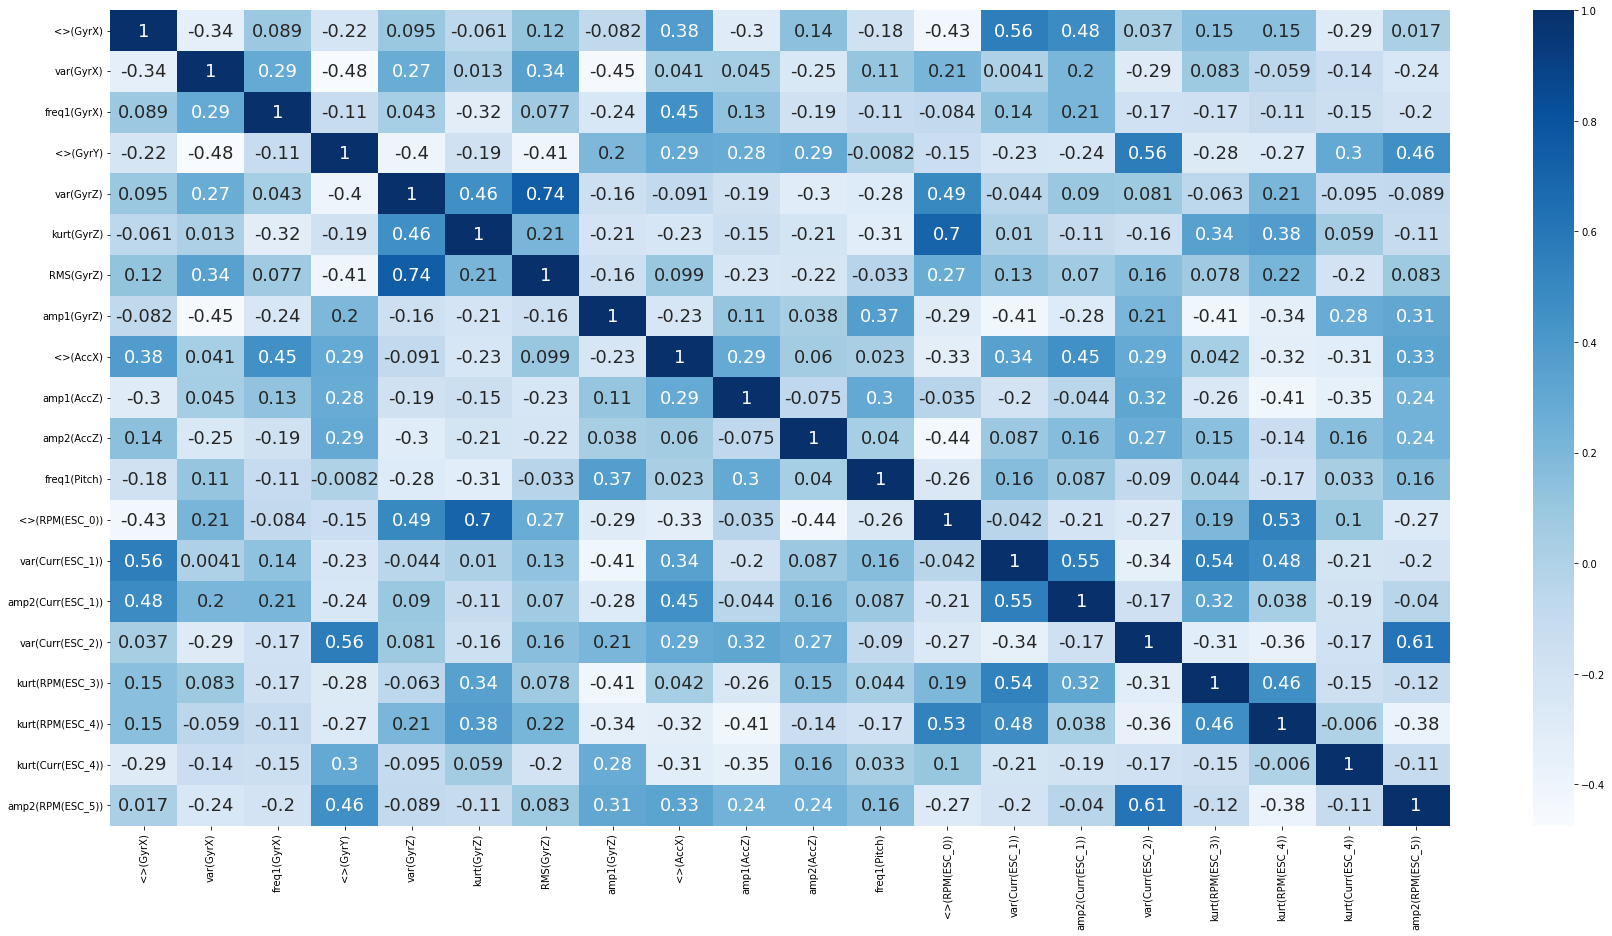

In [20]:
plt.figure(figsize=(30,15))
ax = sns.heatmap(x[x.columns].corr(),cmap="Blues",annot=True,annot_kws={"size": 18})

### Separazione del dataset in training e test

In [21]:
# Random state
rs = 42

# Split the data to check which algorithms learn better (later on we can check )
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=rs)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# look at the shape of the data (many problems can arise from wrong shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1296, 20)
(324, 20)
(1296, 1)
(324, 1)


In [22]:
from sklearn.calibration import CalibratedClassifierCV

# List of classifiers:
classifiers = [
    LogisticRegression(random_state = rs),
    SVC(probability=True),
    MLPClassifier(random_state=rs), # Multi Layer Perceptron
    SGDClassifier(random_state=rs) # Stochastic Gradient Descent 
]

# List of results that will occure:
clf_name = [] # names of the classifiers
model_results = pd.DataFrame.copy(y_test) #resulting of prediction from the models

kfold = StratifiedKFold(n_splits=5) #cross-validation
cv_results = [] # scores from cross validation
cv_acc = [] # mean accuracy from cross validation, need to maximize
cv_std = [] # standard deviation from cross validation, need to minimise

cnfm = [] #confusion matrix
clr = [] #classification report
roc_auc = [] #roc curve:
roc_tpr = []
roc_fpr = []


### Classificazione

Cross-Validation: [0.76153846 0.83397683 0.80694981 0.76447876 0.8030888 ]
Accuracy: 0.77 	 ---> LogisticRegression 
Test: 1    1
Name: Guasto_test, dtype: int64
----------------------------------------------------


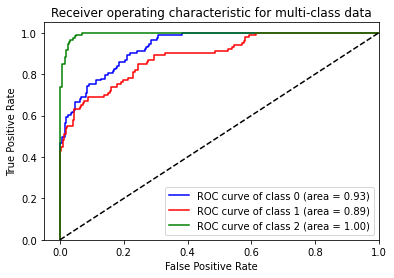

Cross-Validation: [0.49615385 0.50579151 0.50579151 0.42471042 0.54440154]
Accuracy: 0.52 	 ---> SVC 
Test: 2    1
Name: Guasto_test, dtype: int64
----------------------------------------------------


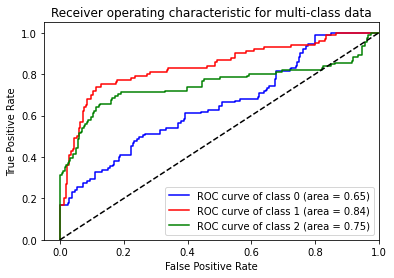

Cross-Validation: [0.64230769 0.68339768 0.75289575 0.72586873 0.72972973]
Accuracy: 0.71 	 ---> MLPClassifier 
Test: 1    1
Name: Guasto_test, dtype: int64
----------------------------------------------------


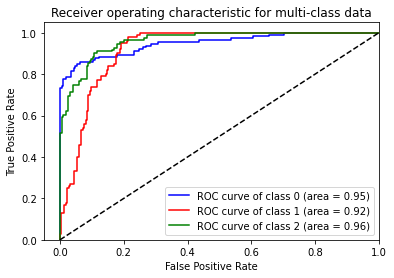

Cross-Validation: [0.48076923 0.67181467 0.57915058 0.56370656 0.58301158]
Accuracy: 0.69 	 ---> SGDClassifier 
Test: 1    1
Name: Guasto_test, dtype: int64
----------------------------------------------------


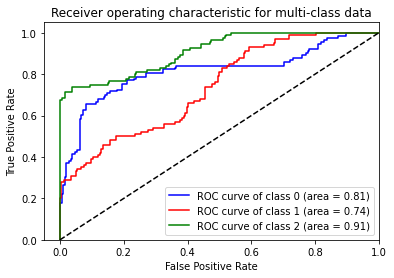

In [23]:
from itertools import cycle
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

n_classes = 3

j=0
# Training the algorithms and results
for clf in classifiers:
    name = clf.__class__.__name__
    clf_name.append(name)
    
    
    #fitting and predictions
    model = clf.fit(x_train, y_train.values.ravel())
    y_pred = model.predict(x_test)
    model_results[name] = y_pred
    
    #accuracy and log loss
    cv_results.append(cross_val_score(clf, x_train, y_train.values.ravel(), scoring = "accuracy",cv = kfold)) # qui invece abbiamo cross validation
    acc = round(accuracy_score(y_test.values.ravel(), y_pred), 2) # accuratezza semplice con training e test
    train_pred = clf.predict(x_test)
    print(f'Cross-Validation: {cross_val_score(clf, x_train, y_train.values.ravel(), scoring = "accuracy",cv = kfold)}') 
    
    print(f'Accuracy: {acc} \t ---> {name} ')

    guasto_pred = pd.Series(model.predict(df_test), name='Guasto_test')
    conteggio = guasto_pred.value_counts()
    print(f'Test: {conteggio}')

    print("----------------------------------------------------")
    
    
    #confusion matrix, clasification report, roc curve
    cnfm.append(confusion_matrix(y_test.values.ravel(), y_pred))
    clr.append(classification_report(y_test.values.ravel(), y_pred))
    #fpr, tpr, thresholds = roc_curve(y_pred, y_test.values.ravel(), pos_label=1)

    if j != 2:
        clf = OneVsRestClassifier(clf)
        y_score = clf.fit(x_train, y_train).decision_function(x_test)
    else:
        y_score = clf.fit(x_train, y_train).predict_proba(x_test)

       

    lb = LabelBinarizer()
    y_true_bin = lb.fit_transform(y_test)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    colors = cycle(['blue', 'red', 'green'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=1.5,
                label='ROC curve of class {0} (area = {1:0.2f})'
                ''.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for multi-class data')
    plt.legend(loc="lower right")
    plt.show()
    
    j += 1

for i in cv_results:
    cv_acc.append(i.mean())
    cv_std.append(i.std())


### Matrici di confusione

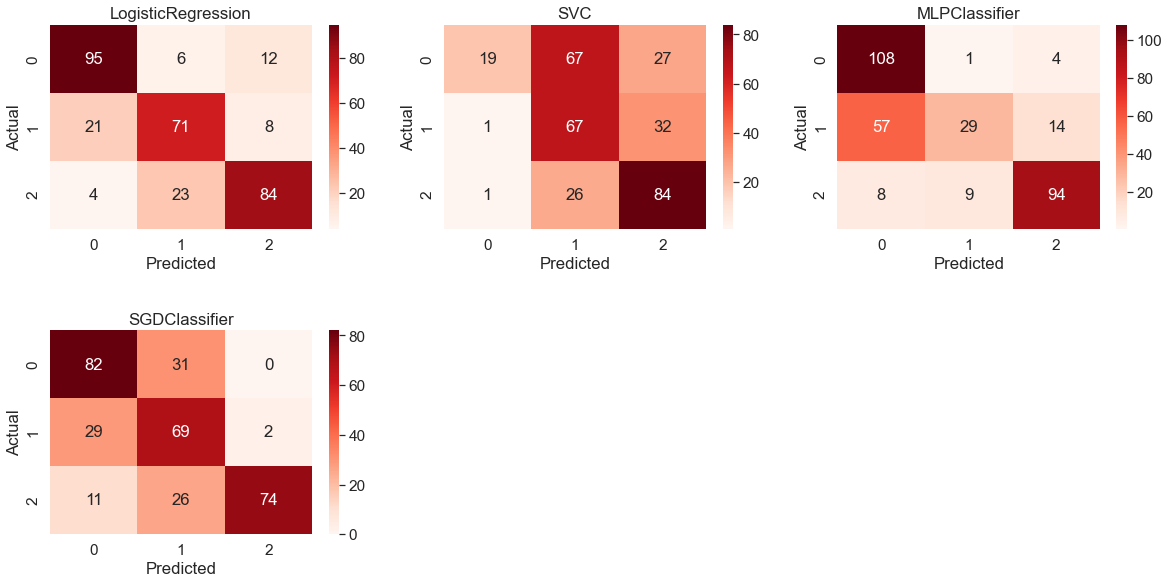

In [24]:
import seaborn as sns
# Confusion matrixes (not-normalized confusion matrix)
plt.figure(figsize=(20,15))
sns.set(font_scale=1.4)
for i in range(len(classifiers)):
    plt.subplot(3,3,i+1) #adjust this acourding to the number of algorithms
    sns.heatmap(cnfm[i], annot=True, fmt="d",cmap="Reds")
    plt.subplots_adjust(hspace = 0.5)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(clf_name[i])

Cross Validation Score

Text(0.5, 1.0, 'Cross validation scores')

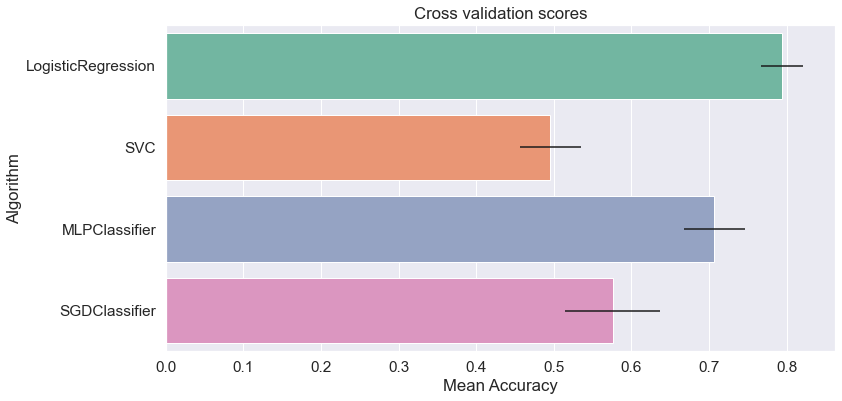

In [25]:
# Cross validation accuracy results graph
cv_res = pd.DataFrame({"CrossValMeans":cv_acc, "CrossValerrors": cv_std,"Algorithm":clf_name})

plt.figure(figsize=(12,6))
sns.barplot(x="CrossValMeans",y="Algorithm",data = cv_res, palette="Set2",orient = "h",**{'xerr':cv_std})
plt.xlabel("Mean Accuracy")
plt.title("Cross validation scores")

Report Classificazione

In [26]:
#Classification reports
for i in range(len(classifiers)):
    print (f"{clf_name[i]} Classification Report:" )
    print (clr[i])

LogisticRegression Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.84      0.82       113
           1       0.71      0.71      0.71       100
           2       0.81      0.76      0.78       111

    accuracy                           0.77       324
   macro avg       0.77      0.77      0.77       324
weighted avg       0.77      0.77      0.77       324

SVC Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.17      0.28       113
           1       0.42      0.67      0.52       100
           2       0.59      0.76      0.66       111

    accuracy                           0.52       324
   macro avg       0.64      0.53      0.49       324
weighted avg       0.65      0.52      0.48       324

MLPClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.96      0.76       113
           1       0.74